<a href="https://colab.research.google.com/github/gkenggen/crop-recommendation/blob/main/dataset_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (2200, 8)

Column Data Types:
 N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object
Missing values per column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Number of duplicate rows: 0

New shape after removing duplicates: (2200, 8)
Label mapping:
{'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64

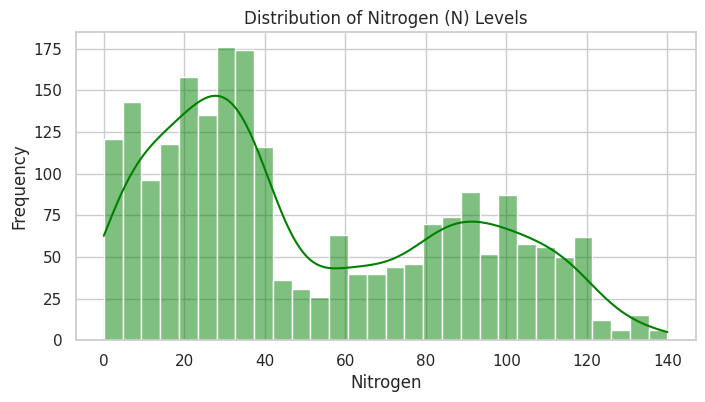

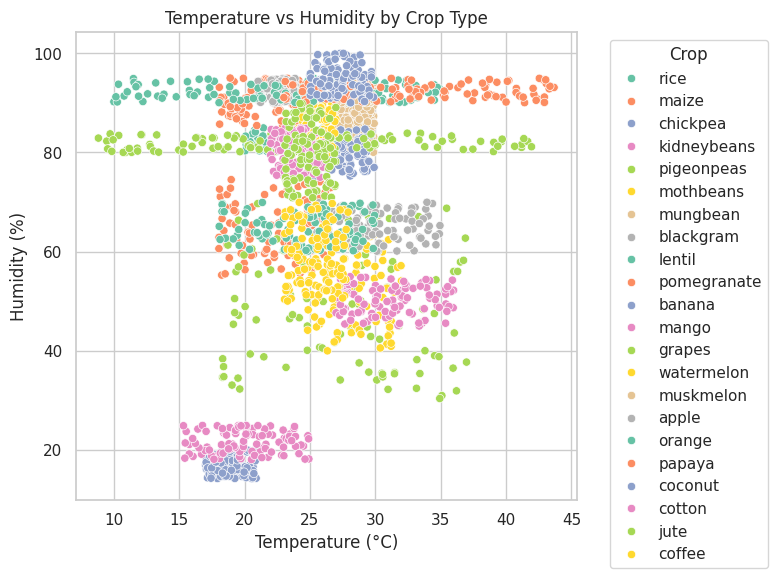

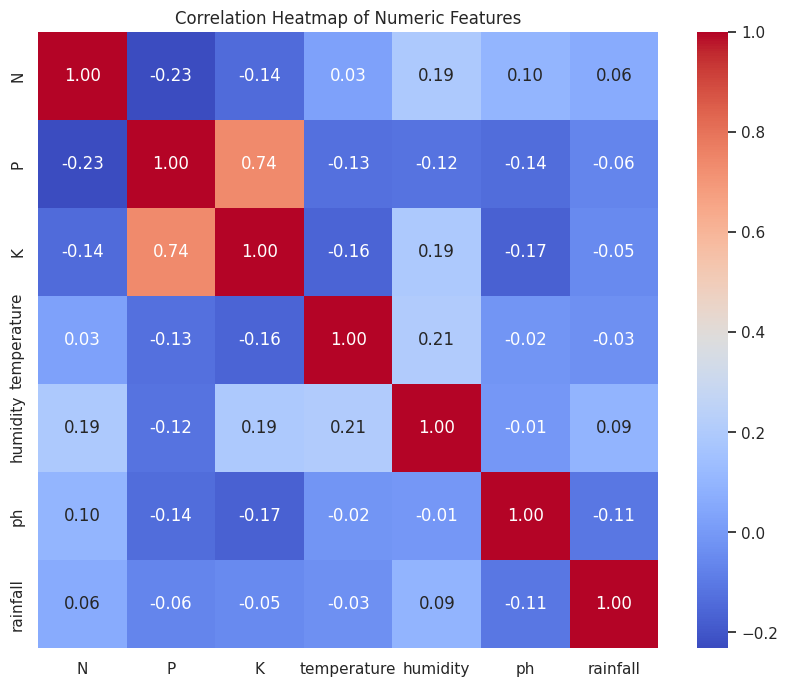

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV file
df = pd.read_csv('Crop_recommendation.csv')

# Display basic info
print("Dataset shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
df.head()

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_rows = df.duplicated()
print(f"\nNumber of duplicate rows: {duplicate_rows.sum()}")

# Optionally display duplicates
if duplicate_rows.sum() > 0:
    print("\nSample duplicate rows:")
    display(df[duplicate_rows].head())

# Drop duplicates (if any)
df_cleaned = df.drop_duplicates()
print(f"\nNew shape after removing duplicates: {df_cleaned.shape}")

from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = df_cleaned.drop('label', axis=1)
y = df_cleaned['label']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Show scaled data
X_scaled.head()

from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Encode target labels (e.g., rice = 0, maize = 1, etc.)
y_encoded = le.fit_transform(y)

# Show unique labels and their numeric codes
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:")
print(label_mapping)

# Just checking the encoded labels
pd.Series(y_encoded).value_counts().head()

# Final dataset
df_final = X_scaled.copy()
df_final['label'] = y_encoded
df_final.head()

# Set plot style
sns.set(style="whitegrid")

# 1. Histogram of Nitrogen (N) levels
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['N'], bins=30, kde=True, color='green')
plt.title('Distribution of Nitrogen (N) Levels')
plt.xlabel('Nitrogen')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot: Temperature vs Humidity colored by crop label
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='humidity', hue='label', palette='Set2', data=df_cleaned)
plt.title('Temperature vs Humidity by Crop Type')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Correlation heatmap of numeric features
plt.figure(figsize=(10, 8))
corr = df_cleaned.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

Cross-validation accuracy scores: [0.99772727 0.99318182 0.99772727 0.99545455 0.98863636]
Mean CV accuracy: 0.9945
Test accuracy: 0.9932
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00     

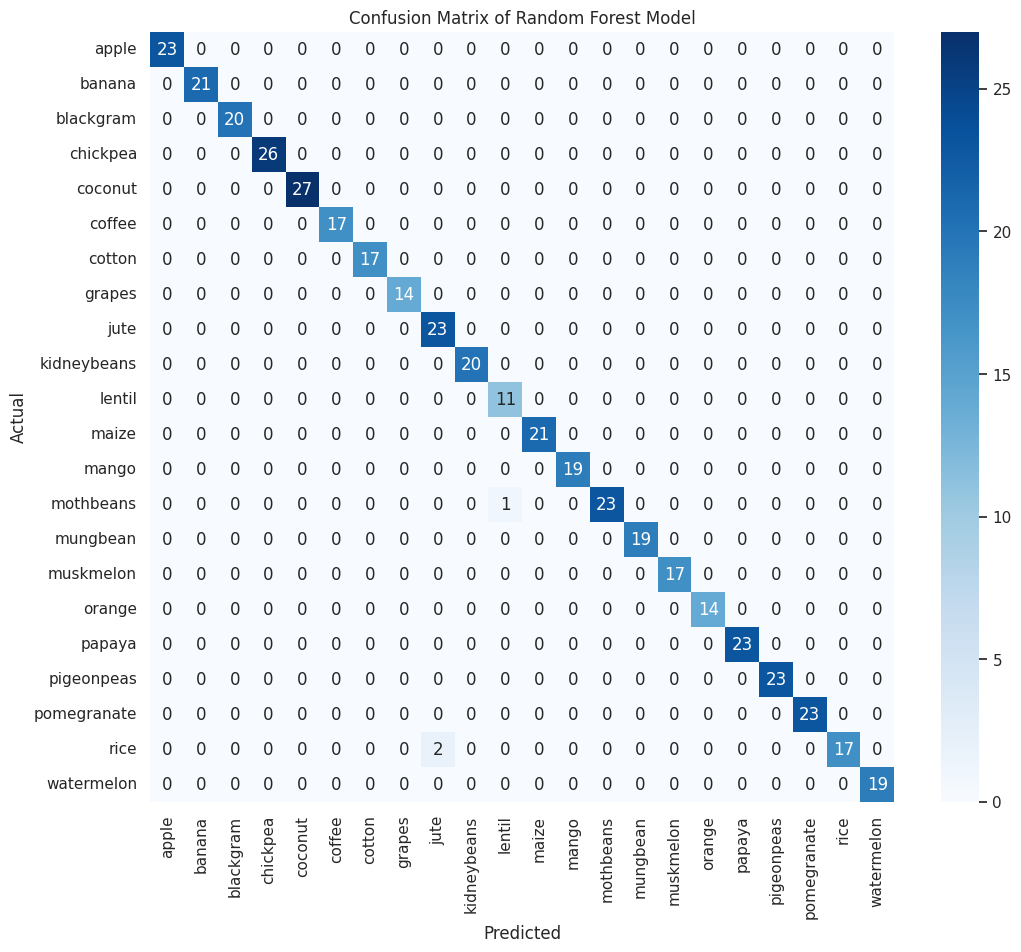

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Cross-validation (5-fold)
cv_scores = cross_val_score(rf_model, X_scaled, y_encoded, cv=5)

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")

# Accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest Model')
plt.show()